In [418]:
import pandas as pd 
import numpy as np
# импортировали библиотеки 

In [419]:
data = pd.read_csv('titanic.csv')
data
# загрузили данные

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [420]:
# Значения колонок 
# Pasengerld - идентификатор пассажира 
# Survived - целевой признак (0 - не выжил 1 - выжил)
# Pclass - класс билета 1 2 3 
# Name - имя и титул пассажира 
# Sex - пол пассажира(male - мужской) (female - женский)
# Age - возраст пассажира 
# SibSp - кол-во родственников жены/мужа на борту
# Parch - кол-во родителей и детей на борту 
# Ticekt - номер билета 
# Fare - стоимость билета 
# Cabin - номер комнаты (если доступно)
# Embarked - порт отправления (C Q S) 


In [423]:
# Работа с гипотезами 
#Гипотеза 1: Женщины выживали чаще, чем мужчины.

In [424]:
# Сгруппируем данные по полу и выживаемости, посчитаем количество выживших и погибших
survival_by_gender = data.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
print(survival_by_gender)

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


In [425]:
# импортирую нужные мне библиотеки для работы с гипотезами.
import seaborn as sns
import matplotlib.pyplot as plt


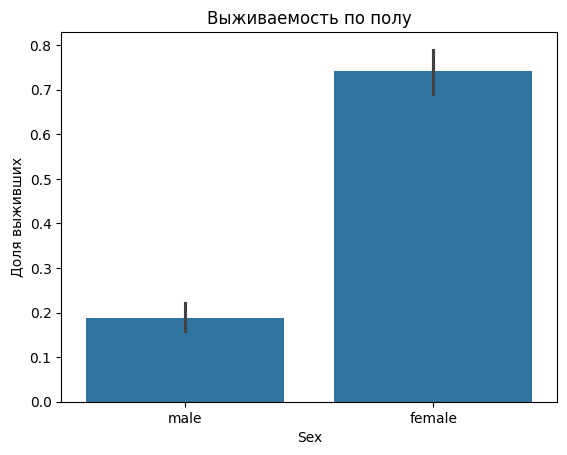

In [426]:
# Сделала график выживаемости по полу и определила, то что женщины выживали чаще чем мужчины
# Использовала библиотеку seaborn для построения столбчатой диаграммы, которая показывает, какая доля мужчин и женщин выжила.
sns.barplot(x='Sex', y='Survived', data=data)

plt.title('Выживаемость по полу')
plt.ylabel('Доля выживших')
plt.show()

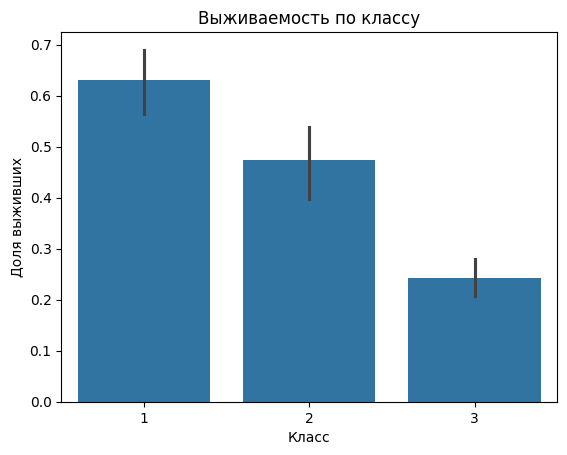

In [427]:
#Гипотеза 2: Пассажиры первого класса выживали чаще, чем пассажиры второго и третьего классов.
sns.barplot(x='Pclass', y='Survived', data=data)

plt.title('Выживаемость по классу')
plt.ylabel('Доля выживших')
plt.xlabel('Класс')
plt.show()

In [428]:
#Гипотеза 3: Дети имели более высокие шансы на выживание.

In [429]:
# Добавим новый столбец 'Child', где дети (младше 16 лет) будут помечены как 1, остальные как 0
data['Child'] = data['Age'].apply(lambda x: 1 if x < 16 else 0)
#Делаем группировку по новому признаку (Child) и считаем долю выживших среди детей и взрослых с помощью функции value_counts(normalize=True).
survival_by_age = data.groupby('Child')['Survived'].value_counts(normalize=True).unstack()
print(survival_by_age)

Survived         0         1
Child                       
0         0.637376  0.362624
1         0.409639  0.590361


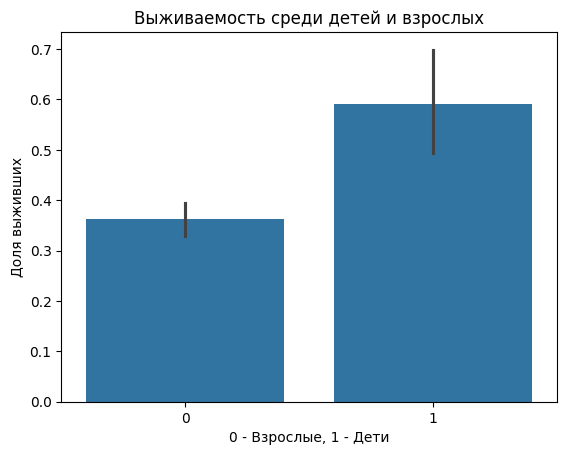

In [430]:
#Используем столбчатую диаграмму для наглядного сравнения шансов на выживание детей и взрослых.
sns.barplot(x='Child', y='Survived', data=data)

plt.title('Выживаемость среди детей и взрослых')
plt.ylabel('Доля выживших')
plt.xlabel('0 - Взрослые, 1 - Дети')
plt.show()

In [431]:
#Гипотеза 4: Пассажиры, у которых были родственники на борту (SibSp, Parch), имели больше шансов выжить.

In [432]:
 # Добавим новый столбец 'Relatives', который будет суммой SibSp и Parch (общее количество родственников на борту)
data['Relatives'] = data['SibSp'] + data['Parch']
# Преобразуем количество родственников в бинарный признак — 1 для тех, у кого были родственники, и 0 для тех, у кого не было.
data['Has_Relatives'] = data['Relatives'].apply(lambda x: 1 if x > 0 else 0)

# Посчитаем долю выживших среди тех, у кого есть и нет родственников
survival_by_relatives = data.groupby('Has_Relatives')['Survived'].value_counts(normalize=True).unstack()
print(survival_by_relatives)

Survived              0         1
Has_Relatives                    
0              0.696462  0.303538
1              0.494350  0.505650


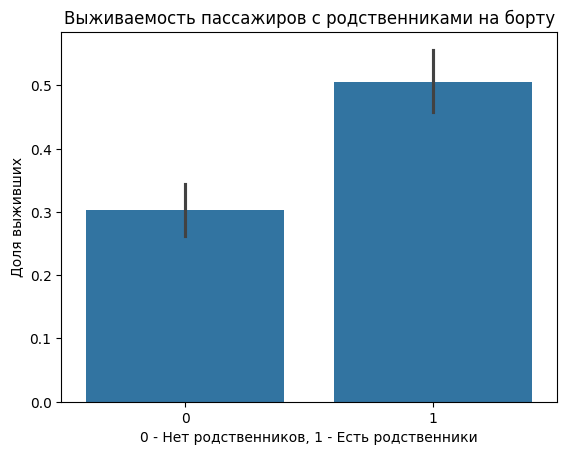

In [433]:
#Построим график, показывающий выживаемость пассажиров с родственниками и без. Видим то что выживали больше с родственниками
sns.barplot(x='Has_Relatives', y='Survived', data=data)

plt.title('Выживаемость пассажиров с родственниками на борту')
plt.ylabel('Доля выживших')
plt.xlabel('0 - Нет родственников, 1 - Есть родственники')
plt.show()

In [434]:
#Гипотеза 5: Пассажиры с более высокими тарифами (Fare) имели больше шансов на выживание.

In [435]:
# Проверим наличие пропущенных значений в Fare
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Разделим стоимость билета на категории по квантилям (например, 4 категории)
# Используем метод pd.qcut, чтобы разделить стоимость билетов на 4 категории (квартиля)
data['Fare_Category'] = pd.qcut(data['Fare'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Сгруппируем данные по категориям Fare и посчитаем долю выживших
# Группируем данные по новому признаку Fare_Category и вычисляем долю выживших для каждой категории с помощью value_counts(normalize=True)
survival_by_fare = data.groupby('Fare_Category')['Survived'].value_counts(normalize=True).unstack()
print(survival_by_fare)

Survived              0         1
Fare_Category                    
Low            0.802691  0.197309
Mid-Low        0.696429  0.303571
Mid-High       0.545045  0.454955
High           0.418919  0.581081


C:\Users\user\AppData\Local\Temp\ipykernel_12252\2501954632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fare'].fillna(data['Fare'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12252\2501954632.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = data.groupby('Fare_Category')['Survived

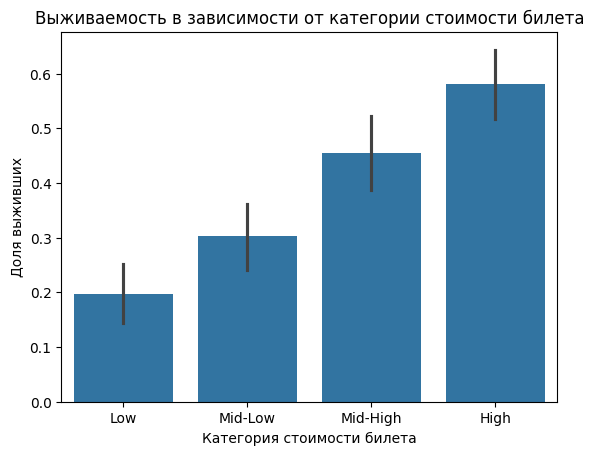

In [436]:
# Построим график, показывающий, как доля выживших меняется в зависимости от стоимости билета. Видим то что пассажиры с высокими тарифами выживали больше.
sns.barplot(x='Fare_Category', y='Survived', data=data)

plt.title('Выживаемость в зависимости от категории стоимости билета')
plt.ylabel('Доля выживших')
plt.xlabel('Категория стоимости билета')
plt.show()

In [437]:
 #Гипотеза 6: Пассажиры, которые сели на корабль в разных портах (Embarked), могли иметь различные шансы на выживание.

In [438]:
# Проверим наличие пропущенных значений в Embarked и заполним их наиболее частым значением
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Группируем данные по порту посадки и вычисляем долю выживших для каждого порта с помощью value_counts(normalize=True)
survival_by_embarked = data.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack()

print(survival_by_embarked)

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660465  0.339535
SАВ       1.000000       NaN


C:\Users\user\AppData\Local\Temp\ipykernel_12252\788008034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


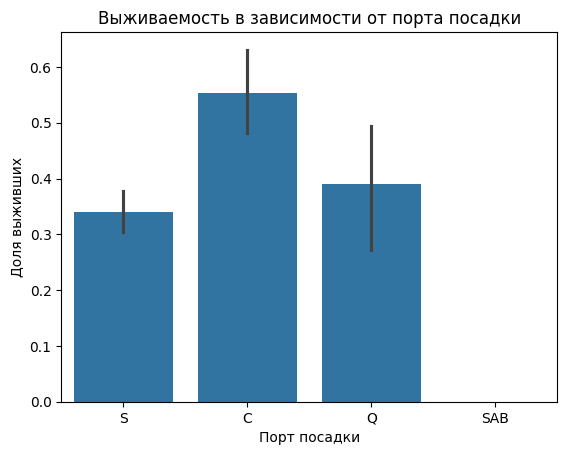

In [439]:
# Построим график, показывающий, как доля выживших меняется в зависимости от порта посадки.
# Видим то что выживаемость с порта C была больше.
sns.barplot(x='Embarked', y='Survived', data=data)

plt.title('Выживаемость в зависимости от порта посадки')
plt.ylabel('Доля выживших')
plt.xlabel('Порт посадки')
plt.show()

In [440]:
# Гипотеза 7: Молодые люди имели больше шансов выжить по сравнению с пожилыми.

In [441]:
# Проверим наличие пропущенных значений в Age и заполним их медианным значением
data['Age'].fillna(data['Age'].median(), inplace=True)
# Разделим возраст на категории,  молодые (до 18), взрослые (от 18 до 60) и пожилые (старше 60)
bins = [0, 18, 60, 100]
labels = ['Молодые', 'Взрослые', 'Пожилые']
data['Age_Category'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Сгруппируем данные по возрастным категориям и выживаемости, посчитаем долю выживших
survival_by_age_category = data.groupby('Age_Category')['Survived'].value_counts(normalize=True).unstack()

print(survival_by_age_category)


Survived             0         1
Age_Category                    
Молодые       0.496403  0.503597
Взрослые      0.634247  0.365753
Пожилые       0.772727  0.227273


C:\Users\user\AppData\Local\Temp\ipykernel_12252\3589557094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12252\3589557094.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_category = data.groupby('Age_Category')['Surv

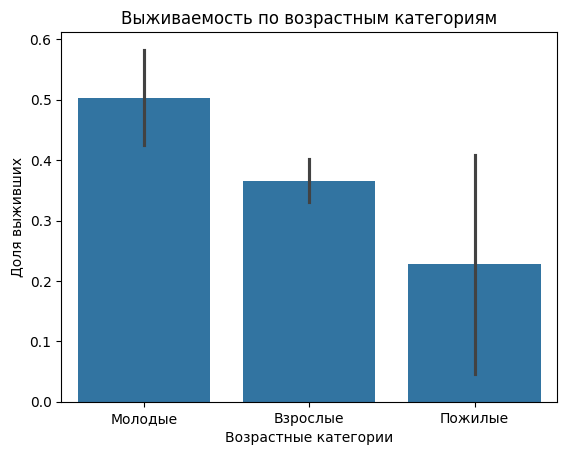

In [442]:
#  Строим график, который показывает, как доля выживших меняется в зависимости от возраста. Видим то что молодые выживали больше чем взрослые и пожилые.
sns.barplot(x='Age_Category', y='Survived', data=data)

plt.title('Выживаемость по возрастным категориям')
plt.ylabel('Доля выживших')
plt.xlabel('Возрастные категории')
plt.show()

In [443]:
# Выводы: 
# Гипотеза: Женщины выживали чаще, чем мужчины.
# Пояснение: Во время катастроф пассажиры часто следуют правилу «женщины и дети первыми», что может привести к более высокому уровню выживаемости женщин.
# Гипотеза: Пассажиры первого класса выживали чаще, чем пассажиры второго и третьего классов.
# Пояснение: Пассажиры первого класса могли иметь больше доступа к спасательным шлюпкам, а также имели лучшие условия, что могло увеличить их шансы на выживание.
# Гипотеза: Дети имели более высокие шансы на выживание.
# Пояснение: Согласно принципу «женщины и дети первыми», дети могли получить приоритет при спасении.
# Гипотеза: Пассажиры, у которых были родственники на борту (SibSp, Parch), имели больше шансов выжить.
# Пояснение: Люди с родственниками могли получать помощь от членов семьи, что увеличивало их шансы на выживание.Гипотеза: Пассажиры с более высокими тарифами (Fare) имели больше шансов на выживание.
# Пояснение: Стоимость билета может коррелировать с социальным статусом, а также с расположением кают ближе к спасательным шлюпкам.
# Гипотеза: Пассажиры, которые сели на корабль в разных портах (Embarked), могли иметь различные шансы на выживание.
# Пояснение: Различия в социальном статусе пассажиров, севших в разных портах, могут влиять на их возможности к спасению.
# Гипотеза: Молодые люди имели больше шансов выжить по сравнению с пожилыми.
# Пояснение: Молодые люди могли быть физически крепче и быстрее реагировать на критическую ситуацию, что увеличивало их шансы.

In [444]:
# Заменили колонку 'Fare_Category' на численные значения.
d = {'Low':0, 'Mid-Low' :1, 'Mid':2, 'Mid-High':3, 'High':4} # создаем словарь


In [445]:
data['Fare_Category'] = data['Fare_Category'].apply(lambda x:d[x])

In [446]:
# Заменили колонку 'Age_Category' на численные значения. 
passs = {'Взрослые':0, 'Молодые' :1, 'Пожилые': 2 }  # создаем словарь

In [447]:
data['Age_Category'] = data['Age_Category'].apply(lambda x:passs[x])


In [448]:
# Заменяем male и female на 0 и 1 с помощью словаря 
d = {'male':0, 'female' :1} # создаем словарь 

In [449]:
data['Sex'] = data['Sex'].apply(lambda x:d[x])

In [450]:
data['Sex'].head() # Теперь везде 0 и 1 в колонке 'Sex'.

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [451]:
# Заполняем пустые ячейки медианным значением по возрасту.
data['Age'] = data['Age'].fillna(X['Age'].median)

In [452]:
data['Age'].isnull().sum()
# Все ячейки в колонке возраст заполнены 

0

In [453]:
# Проваеряем есть ли пустые ячейки в колонке 'Sex'.
data['Sex'].isnull().sum()

0

In [454]:
# Проваеряем есть ли пустые ячейки в колонке 'Pclass'.
data['Pclass'].isnull().sum()

0

In [455]:
# Проваеряем есть ли пустые ячейки в колонке 'Fare'.
data['Fare'].isnull().sum()

0

In [456]:
# LabelEncoder: преобразует категориальные текстовые данные в числовые значения.
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}


In [457]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [458]:
# Посмотрела корреляцию данных. 
data.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Relatives,Has_Relatives,Fare_Category,Age_Category
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,-0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.011151,-0.017941,-0.040143,-0.057462,-0.023617,-0.006265
Survived,-0.005007,1.000000,-0.338481,-0.057343,0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.168504,0.136107,0.016639,0.203367,0.298639,0.048840
Pclass,-0.035144,-0.338481,1.000000,0.052831,-0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.162990,0.121920,0.065997,-0.135207,-0.622681,0.010250
Name,-0.038559,-0.057343,0.052831,1.000000,-0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.007682,-0.033899,-0.036309,-0.070722,-0.057830,-0.021000
Sex,-0.042939,0.543351,-0.131900,-0.020314,1.000000,-0.081163,0.114631,0.245489,-0.059372,0.182333,-0.096681,-0.109121,0.111141,0.200988,0.303646,0.242886,0.048449
Age,0.034212,-0.064910,-0.339898,0.048252,-0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.018761,-0.566310,-0.245619,-0.171647,0.079545,-0.183045
SibSp,-0.057527,-0.035322,0.083081,-0.017230,0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.067441,0.352437,0.890712,0.584471,0.399508,0.188374
Parch,-0.001652,0.081629,0.018443,-0.049105,0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.039059,0.351481,0.783111,0.583398,0.405031,0.218062
Ticket,-0.056554,-0.164549,0.319869,0.047348,-0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.002012,-0.030699,0.064302,-0.028314,-0.141849,-0.012135
Fare,0.012658,0.257307,-0.549500,-0.049173,0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.225021,0.003753,0.217138,0.271832,0.559734,0.021789


In [459]:
# Проваеряем есть ли пустые ячейки в колонке 'Age'.
data['Age'].isnull().sum()
# Выдало что в колонке Age 177 пассажиров у которых не указан возраст

0

In [460]:
# выбор столбца Survived, который содержит информацию о том, выжил ли пассажир (1 — выжил, 0 — не выжил).
data['Survived'].value_counts()
# Это означает, что 549 человек не выжило, а 342 выжили.

Survived
0    549
1    342
Name: count, dtype: int64

In [461]:
data.shape
# 891 строка (пассажир) и 12 столбцов (характеристик).

(891, 17)

In [462]:
# Проверяет на наличие пустых ячеек
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Child            0
Relatives        0
Has_Relatives    0
Fare_Category    0
Age_Category     0
dtype: int64

In [463]:
# датафрейм содержит 891 запись и 12 столбцов, среди которых есть как числовые, так и категориальные данные.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    int32   
 4   Sex            891 non-null    int64   
 5   Age            891 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    int32   
 9   Fare           891 non-null    float64 
 10  Cabin          891 non-null    int32   
 11  Embarked       891 non-null    int32   
 12  Child          891 non-null    int64   
 13  Relatives      891 non-null    int64   
 14  Has_Relatives  891 non-null    int64   
 15  Fare_Category  891 non-null    category
 16  Age_Category   891 non-null    category
dtypes: category(2), float64(2), int32(4

In [467]:
# вычисление медианы значений в столбце Age.
data['Age'].fillna(data['Age'].median(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12252\2124576783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


In [471]:
# возвращает уникальные значения из указанного столбца (или массива данных).
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Modeling

In [473]:
import numpy as np
np.var(data['Sex']) # считает дисперсию (variance) данных по полу пассажиров. 
# Дисперсия измеряет, насколько данные отклоняются от среднего значения.

0.22821808306282682

In [474]:
import subprocess
import sys
# используется для автоматической установки Python-пакетов через pip. 
# Здесь устанавливаются библиотеки для работы с нейронными сетями: Keras и TensorFlow.
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
install("keras")
install("tensorflow")

In [475]:
columns_target = ['Survived'] # наша целевая колонка
columns_train = ['Pclass', 'Sex', 'Age', 'Fare'] # Включает в себя колонки 'Pclass', 'Sex', 'Age', 'Fare'.


In [476]:
X = data[columns_train] # Включает в себя колонки 'Pclass', 'Sex', 'Age', 'Fare'.
y = data[columns_target] # Включает в себя колонку 'Survived'.

In [477]:
# Обучение модели
# Импортируются необходимые библиотеки train_test_split, StandardScaler, Sequential, l2.
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import normalize
from keras.regularizers import l2


# Train-test split
# train_test_split — разделяет данные на обучающую (80%) и тестовую (20%) выборки. 
# random_state=42 фиксирует случайность для повторимости результатов.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизировать data вместо нормализации
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создаем модель нейронной сети
model = Sequential()

# Скорректируем архитектуру, увеличиваем количество единиц измерения и добавить выпадающие слои Dense, Dropout.
model.add(Dense(units=128, activation='leaky_relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='leaky_relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='leaky_relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.05)))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

# Скомпилируем модель, добавляем различные скорости обучения или оптимизаторы.
# используется оптимизатор Adam, функция потерь — binary_crossentropy.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Тренировка модели по эпохам
# модель обучается на данных X_train и y_train в течение 30 эпох с размером батча 20. 
# 20% данных из обучающей выборки используется для валидации модели.
history = model.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/30


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5681 - loss: 3.4823 - val_accuracy: 0.8042 - val_loss: 2.7610
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7642 - loss: 2.5996 - val_accuracy: 0.8112 - val_loss: 2.0562
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7519 - loss: 1.9813 - val_accuracy: 0.8252 - val_loss: 1.5674
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7897 - loss: 1.5284 - val_accuracy: 0.8252 - val_loss: 1.2279
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 1.2023 - val_accuracy: 0.8182 - val_loss: 0.9915
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.9875 - val_accuracy: 0.8322 - val_loss: 0.8258
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7692 - loss: 0.8498 - val_accuracy: 0.8182 - val_loss: 0.7131
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7709 - loss: 0.7692 - val_accuracy: 0.7972 - val_loss: 0.6373
Ep

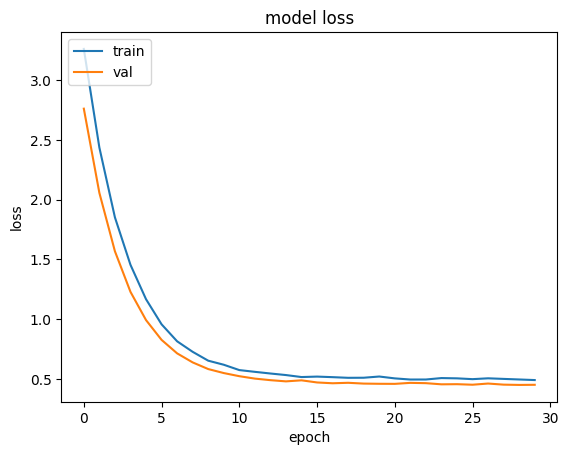

In [478]:
import matplotlib.pyplot as plt
%matplotlib inline
 # Строим график снижения loss по эпохам
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

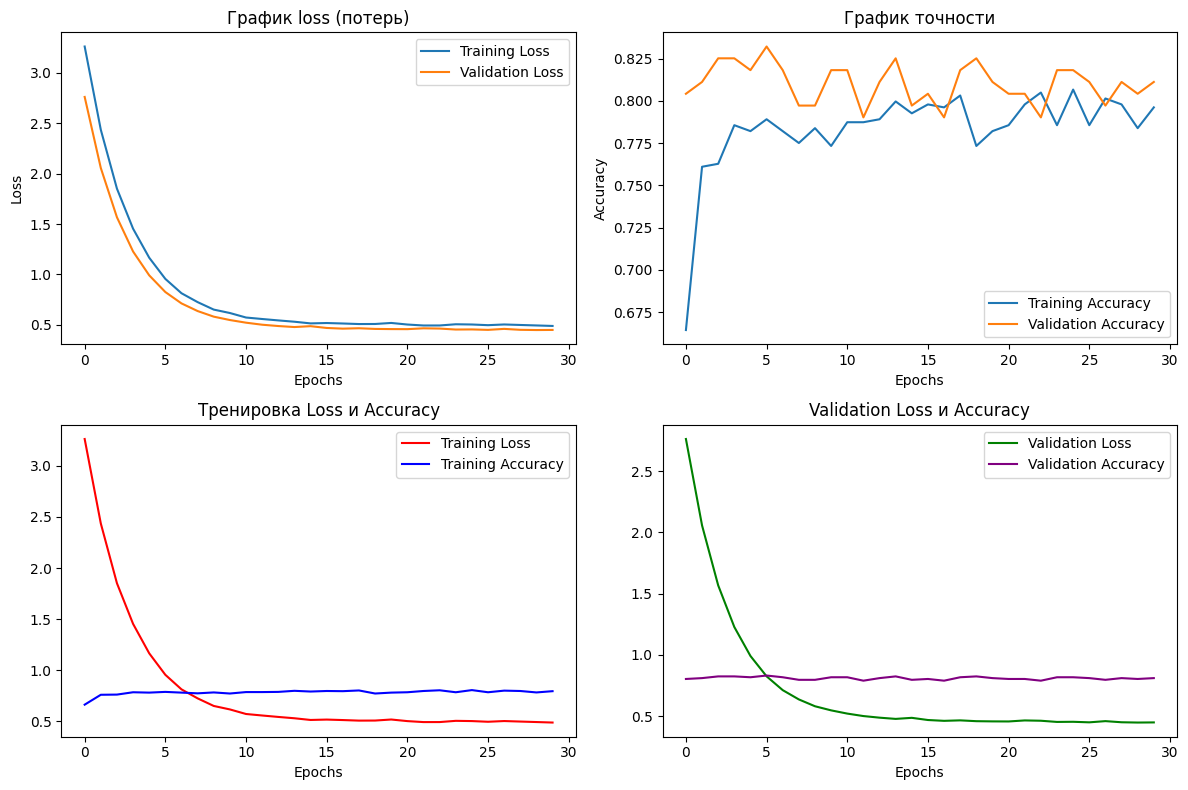

In [479]:
class HistoryDummy:
    def __init__(self):
        self.history = {
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'accuracy': history.history['accuracy'],
            'val_accuracy': history.history['val_accuracy']
        }

history = HistoryDummy()

# График 1: Потери при обучении в сравнении с потерями при проверке
plt.figure(figsize=(12, 8))

# График loss (потерь)
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('График loss (потерь)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('График точности')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Комбинированные потери и точность на одном графике
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.title('Тренировка Loss и Accuracy')
plt.xlabel('Epochs')
plt.legend()

# График val_loss и val_accuracy
plt.subplot(2, 2, 4)
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='purple')
plt.title('Validation Loss и Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [480]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

['fully-connected-model.pkl']

In [481]:
model_loaded = joblib.load('fully-connected-model.pkl')

In [482]:
model_loaded.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[0.14710082],
       [0.16293319],
       [0.16300426],
       [0.8913935 ],
       [0.51701665],
       [0.96652895],
       [0.4861793 ],
       [0.1761456 ],
       [0.5134568 ],
       [0.9715524 ],
       [0.37176663],
       [0.118363  ],
       [0.46334407],
       [0.14110611],
       [0.15168694],
       [0.9714267 ],
       [0.32906485],
       [0.48607495],
       [0.17534207],
       [0.300677  ],
       [0.15363969],
       [0.38549656],
       [0.5021262 ],
       [0.16333257],
       [0.1468944 ],
       [0.19765936],
       [0.3304574 ],
       [0.16337729],
       [0.22250962],
       [0.48248056],
       [0.16553022],
       [0.49476263],
       [0.45417103],
       [0.4864427 ],
       [0.16818091],
       [0.14891966],
       [0.45592004],
       [0.4861793 ],
       [0.9686791 ],
       [0.14518502],
       [0.22511429],
       [0.14296111],
       [0.14522375],
       [0.1451484 ],
       [0.48390144],
       [0.18067205],
       [0.16559733],
       [0.156

In [483]:
# Find Outliers in DataFrame

import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5, 100],
    'B': [10, 12, 14, 13, 15, 200],
    'C': [5, 6, 7, 8, 9, 300]
}

df = pd.DataFrame(data)

# Function to find outliers
def find_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Get outliers
outliers = find_outliers(df)
print(outliers)

{'A':      A    B    C
5  100  200  300, 'B':      A    B    C
5  100  200  300, 'C':      A    B    C
5  100  200  300}
